In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
#Creat dataframe from location:
df = pd.read_csv(r"E:\study hard\uneeq\task3\healthcare_dataset.csv")

In [4]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [5]:
df.shape

(10000, 15)

In [6]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
5,Patrick Parker,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,180,Urgent,2020-08-23,Aspirin,Abnormal
6,Charles Horton,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,161,Urgent,2021-04-15,Lipitor,Abnormal
7,Patty Norman,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,384,Elective,2019-06-02,Aspirin,Normal
8,Ryan Hayes,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,215,Elective,2020-12-22,Aspirin,Abnormal
9,Sharon Perez,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,310,Urgent,2022-12-16,Aspirin,Normal


In [7]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [9]:
# Loop for identify all unique values
for i in df.columns:
    # Skip variables 'data' and 'place'
    if i in ['Name', 'Age', 'Doctor','Billing Amount','Room Number','Date of Admission','Discharge Date']:
        continue
    unique_values = df[i].unique()
    print(f"Unique values in column '{i}': {unique_values}")

Unique values in column 'Gender': ['Female' 'Male']
Unique values in column 'Blood Type': ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
Unique values in column 'Medical Condition': ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Unique values in column 'Hospital': ['Wallace-Hamilton' 'Burke, Griffin and Cooper' 'Walton LLC' ...
 'Nash-Krueger' 'Wilson-Lyons' 'Torres, Young and Stewart']
Unique values in column 'Insurance Provider': ['Medicare' 'UnitedHealthcare' 'Aetna' 'Cigna' 'Blue Cross']
Unique values in column 'Admission Type': ['Elective' 'Emergency' 'Urgent']
Unique values in column 'Medication': ['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
Unique values in column 'Test Results': ['Inconclusive' 'Normal' 'Abnormal']


In [10]:
#check for all missing values 
df.isna().all()

Name                  False
Age                   False
Gender                False
Blood Type            False
Medical Condition     False
Date of Admission     False
Doctor                False
Hospital              False
Insurance Provider    False
Billing Amount        False
Room Number           False
Admission Type        False
Discharge Date        False
Medication            False
Test Results          False
dtype: bool

## 1st stage Basic data type cleaning and selection based on the above observations
# Name -> drop
# Age -> need
# Gender -> need
# Blood Type -> need
# Medical Condition -> unique
# Date of Admission -> Change Data Type
# Doctor -> irrelevant need to drop
# Hospital -> May be irrelevant 
# Insurance Provider -> may be irrelevant
# Billing Amount -> Dependent variable
# Room Number -> irrelevant drop
# Admission Type -> Unique
# Discharge Date -> Change to date and add one new variable 
# Medication -> relevant
# Test Results -> relevant

In [11]:
#1. Drop Name, Doctor, and Room Number

# Drop columns from the DataFrame using the tuple
df = df.drop(['Name', 'Doctor', 'Room Number'], axis=1)
df.shape

(10000, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Date of Admission   10000 non-null  object 
 5   Hospital            10000 non-null  object 
 6   Insurance Provider  10000 non-null  object 
 7   Billing Amount      10000 non-null  float64
 8   Admission Type      10000 non-null  object 
 9   Discharge Date      10000 non-null  object 
 10  Medication          10000 non-null  object 
 11  Test Results        10000 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 937.6+ KB


In [13]:
#Change object to date type Date of Admission and Discharge Date

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [14]:
df['Date of Admission'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Date of Admission
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [15]:
df['Discharge Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Discharge Date
Non-Null Count  Dtype         
--------------  -----         
10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.3 KB


In [16]:
# add new variable no of says admited = discharge date - date of admission
df["admited_days"] = (df['Discharge Date']-df['Date of Admission']).dt.days
df['admited_days'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: admited_days
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  datetime64[ns]
 5   Hospital            10000 non-null  object        
 6   Insurance Provider  10000 non-null  object        
 7   Billing Amount      10000 non-null  float64       
 8   Admission Type      10000 non-null  object        
 9   Discharge Date      10000 non-null  datetime64[ns]
 10  Medication          10000 non-null  object        
 11  Test Results        10000 non-null  object        
 12  admited_days        10000 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), obj

In [18]:
# drop hospital, date of admission and discharge date:
df= df.drop(['Date of Admission','Discharge Date','Hospital'], axis=1)

In [19]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,admited_days
0,81,Female,O-,Diabetes,Medicare,37490.983364,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,UnitedHealthcare,47304.064845,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,Medicare,36874.896997,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,Medicare,23303.322092,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,UnitedHealthcare,18086.344184,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,UnitedHealthcare,39606.840083,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,Blue Cross,5995.717488,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,Blue Cross,49559.202905,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,UnitedHealthcare,25236.344761,Urgent,Penicillin,Normal,20


In [20]:
## Model building
df['temp'] = df.iloc[:, 0]  # Store the values of the first column in a temporary column
df.iloc[:,0] = df.iloc[:, 5]  # Replace the values of the first column with the values of the second column

In [25]:
df.iloc[:,5] = df.iloc[:,10]  # Replace the values of the second column with the values stored in the temporary column
df = df.drop('temp', axis=1)  # Drop the temporary column

In [26]:
df

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,admited_days
0,37490.983364,Female,O-,Diabetes,Medicare,81.0,Elective,Aspirin,Inconclusive,14
1,47304.064845,Male,O+,Asthma,UnitedHealthcare,35.0,Emergency,Lipitor,Normal,14
2,36874.896997,Male,B-,Obesity,Medicare,61.0,Emergency,Lipitor,Normal,30
3,23303.322092,Male,B-,Asthma,Medicare,49.0,Urgent,Penicillin,Abnormal,1
4,18086.344184,Male,O-,Arthritis,UnitedHealthcare,51.0,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,39606.840083,Male,A+,Obesity,UnitedHealthcare,83.0,Elective,Ibuprofen,Abnormal,4
9996,5995.717488,Female,AB+,Arthritis,Blue Cross,47.0,Emergency,Ibuprofen,Normal,23
9997,49559.202905,Male,B-,Arthritis,Blue Cross,54.0,Elective,Ibuprofen,Normal,14
9998,25236.344761,Male,A+,Arthritis,UnitedHealthcare,84.0,Urgent,Penicillin,Normal,20


In [27]:
# remane Col
df = df.rename(columns={'Age': 'Billing_Amount',
                        'Billing Amount':'Age'})

In [28]:
df

,Billing_Amount,Gender,Blood Type,Medical Condition,Insurance Provider,Age,Admission Type,Medication,Test Results,admited_days
0,37490.983364,Female,O-,Diabetes,Medicare,81.0,Elective,Aspirin,Inconclusive,14
1,47304.064845,Male,O+,Asthma,UnitedHealthcare,35.0,Emergency,Lipitor,Normal,14
2,36874.896997,Male,B-,Obesity,Medicare,61.0,Emergency,Lipitor,Normal,30
3,23303.322092,Male,B-,Asthma,Medicare,49.0,Urgent,Penicillin,Abnormal,1
4,18086.344184,Male,O-,Arthritis,UnitedHealthcare,51.0,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...
9995,39606.840083,Male,A+,Obesity,UnitedHealthcare,83.0,Elective,Ibuprofen,Abnormal,4
9996,5995.717488,Female,AB+,Arthritis,Blue Cross,47.0,Emergency,Ibuprofen,Normal,23
9997,49559.202905,Male,B-,Arthritis,Blue Cross,54.0,Elective,Ibuprofen,Normal,14
9998,25236.344761,Male,A+,Arthritis,UnitedHealthcare,84.0,Urgent,Penicillin,Normal,20


In [29]:
#change data type flot to int
df['Billing_Amount'].astype(int)

0       37490
1       47304
2       36874
3       23303
4       18086
        ...  
9995    39606
9996     5995
9997    49559
9998    25236
9999    37223
Name: Billing_Amount, Length: 10000, dtype: int32

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Billing_Amount      10000 non-null  float64
 1   Gender              10000 non-null  object 
 2   Blood Type          10000 non-null  object 
 3   Medical Condition   10000 non-null  object 
 4   Insurance Provider  10000 non-null  object 
 5   Age                 10000 non-null  float64
 6   Admission Type      10000 non-null  object 
 7   Medication          10000 non-null  object 
 8   Test Results        10000 non-null  object 
 9   admited_days        10000 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 781.4+ KB


In [31]:
# Now creating dummy variables for 
df_final = pd.get_dummies(df,drop_first=True)

In [32]:
df_final.head()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
0,37490.983364,81.0,14,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
1,47304.064845,35.0,14,True,False,False,False,False,False,True,...,False,True,True,False,False,True,False,False,False,True
2,36874.896997,61.0,30,True,False,False,False,False,True,False,...,True,False,True,False,False,True,False,False,False,True
3,23303.322092,49.0,1,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,True,False,False
4,18086.344184,51.0,24,True,False,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,True


In [34]:
# Correlation values
df_final.corr()

,Billing_Amount,Age,admited_days,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,...,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Inconclusive,Test Results_Normal
Billing_Amount,1.000000e+00,-0.009483,-0.013507,0.002340,0.019498,0.010687,-0.003813,4.105057e-07,0.004328,-0.012869,...,-0.017852,-0.003958,-0.040940,0.022611,-0.002741,0.021765,-0.013044,-0.015671,0.007988,-0.009105
Age,-9.483329e-03,1.000000,0.009111,-0.008099,-0.013374,-0.001922,0.006053,1.494969e-02,-0.011896,-0.001025,...,-0.009226,0.015040,-0.002826,0.004191,-0.002879,-0.003273,0.002851,0.009182,-0.009254,0.012275
admited_days,-1.350671e-02,0.009111,1.000000,-0.006361,-0.023429,0.006592,-0.002064,8.272633e-03,0.009040,0.000909,...,0.013387,-0.012805,0.003966,-0.007091,0.003700,-0.008107,-0.000709,0.011504,-0.007224,-0.003575
Gender_Male,2.339709e-03,-0.008099,-0.006361,1.000000,-0.002864,0.000866,-0.014356,-5.254542e-03,0.000236,-0.004624,...,-0.029457,-0.002594,0.003281,-0.005521,0.001919,0.003297,-0.013239,0.013847,-0.014030,-0.002131
Blood Type_A-,1.949806e-02,-0.013374,-0.023429,-0.002864,1.000000,-0.142591,-0.143691,-1.416824e-01,-0.142202,-0.141942,...,-0.002553,-0.004479,0.007816,-0.012703,0.010196,-0.001860,0.004667,-0.015997,-0.009504,0.003590
Blood Type_AB+,1.068717e-02,-0.001922,0.006592,0.000866,-0.142591,1.000000,-0.145013,-1.429856e-01,-0.143510,-0.143248,...,0.007522,-0.011985,-0.008658,0.009817,-0.012557,0.008655,-0.012772,0.017434,0.009478,-0.007708
Blood Type_AB-,-3.813176e-03,0.006053,-0.002064,-0.014356,-0.143691,-0.145013,1.000000,-1.440886e-01,-0.144617,-0.144353,...,-0.010219,-0.000147,0.011234,-0.007190,0.013599,-0.003672,0.017248,-0.011136,0.004588,-0.009936
Blood Type_B+,4.105057e-07,0.014950,0.008273,-0.005255,-0.141682,-0.142986,-0.144089,1.000000e+00,-0.142595,-0.142335,...,-0.001130,0.003755,0.007787,-0.000538,-0.007468,0.006295,-0.001582,-0.010922,0.010549,-0.005436
Blood Type_B-,4.327804e-03,-0.011896,0.009040,0.000236,-0.142202,-0.143510,-0.144617,-1.425953e-01,1.000000,-0.142857,...,0.012255,-0.000490,-0.013778,-0.006098,-0.000300,0.007324,-0.010380,0.006485,-0.013056,-0.001951
Blood Type_O+,-1.286917e-02,-0.001025,0.000909,-0.004624,-0.141942,-0.143248,-0.144353,-1.423348e-01,-0.142857,1.000000,...,-0.010161,0.022899,-0.007172,0.018410,0.002580,-0.008654,-0.014368,0.013825,0.011623,-0.002401


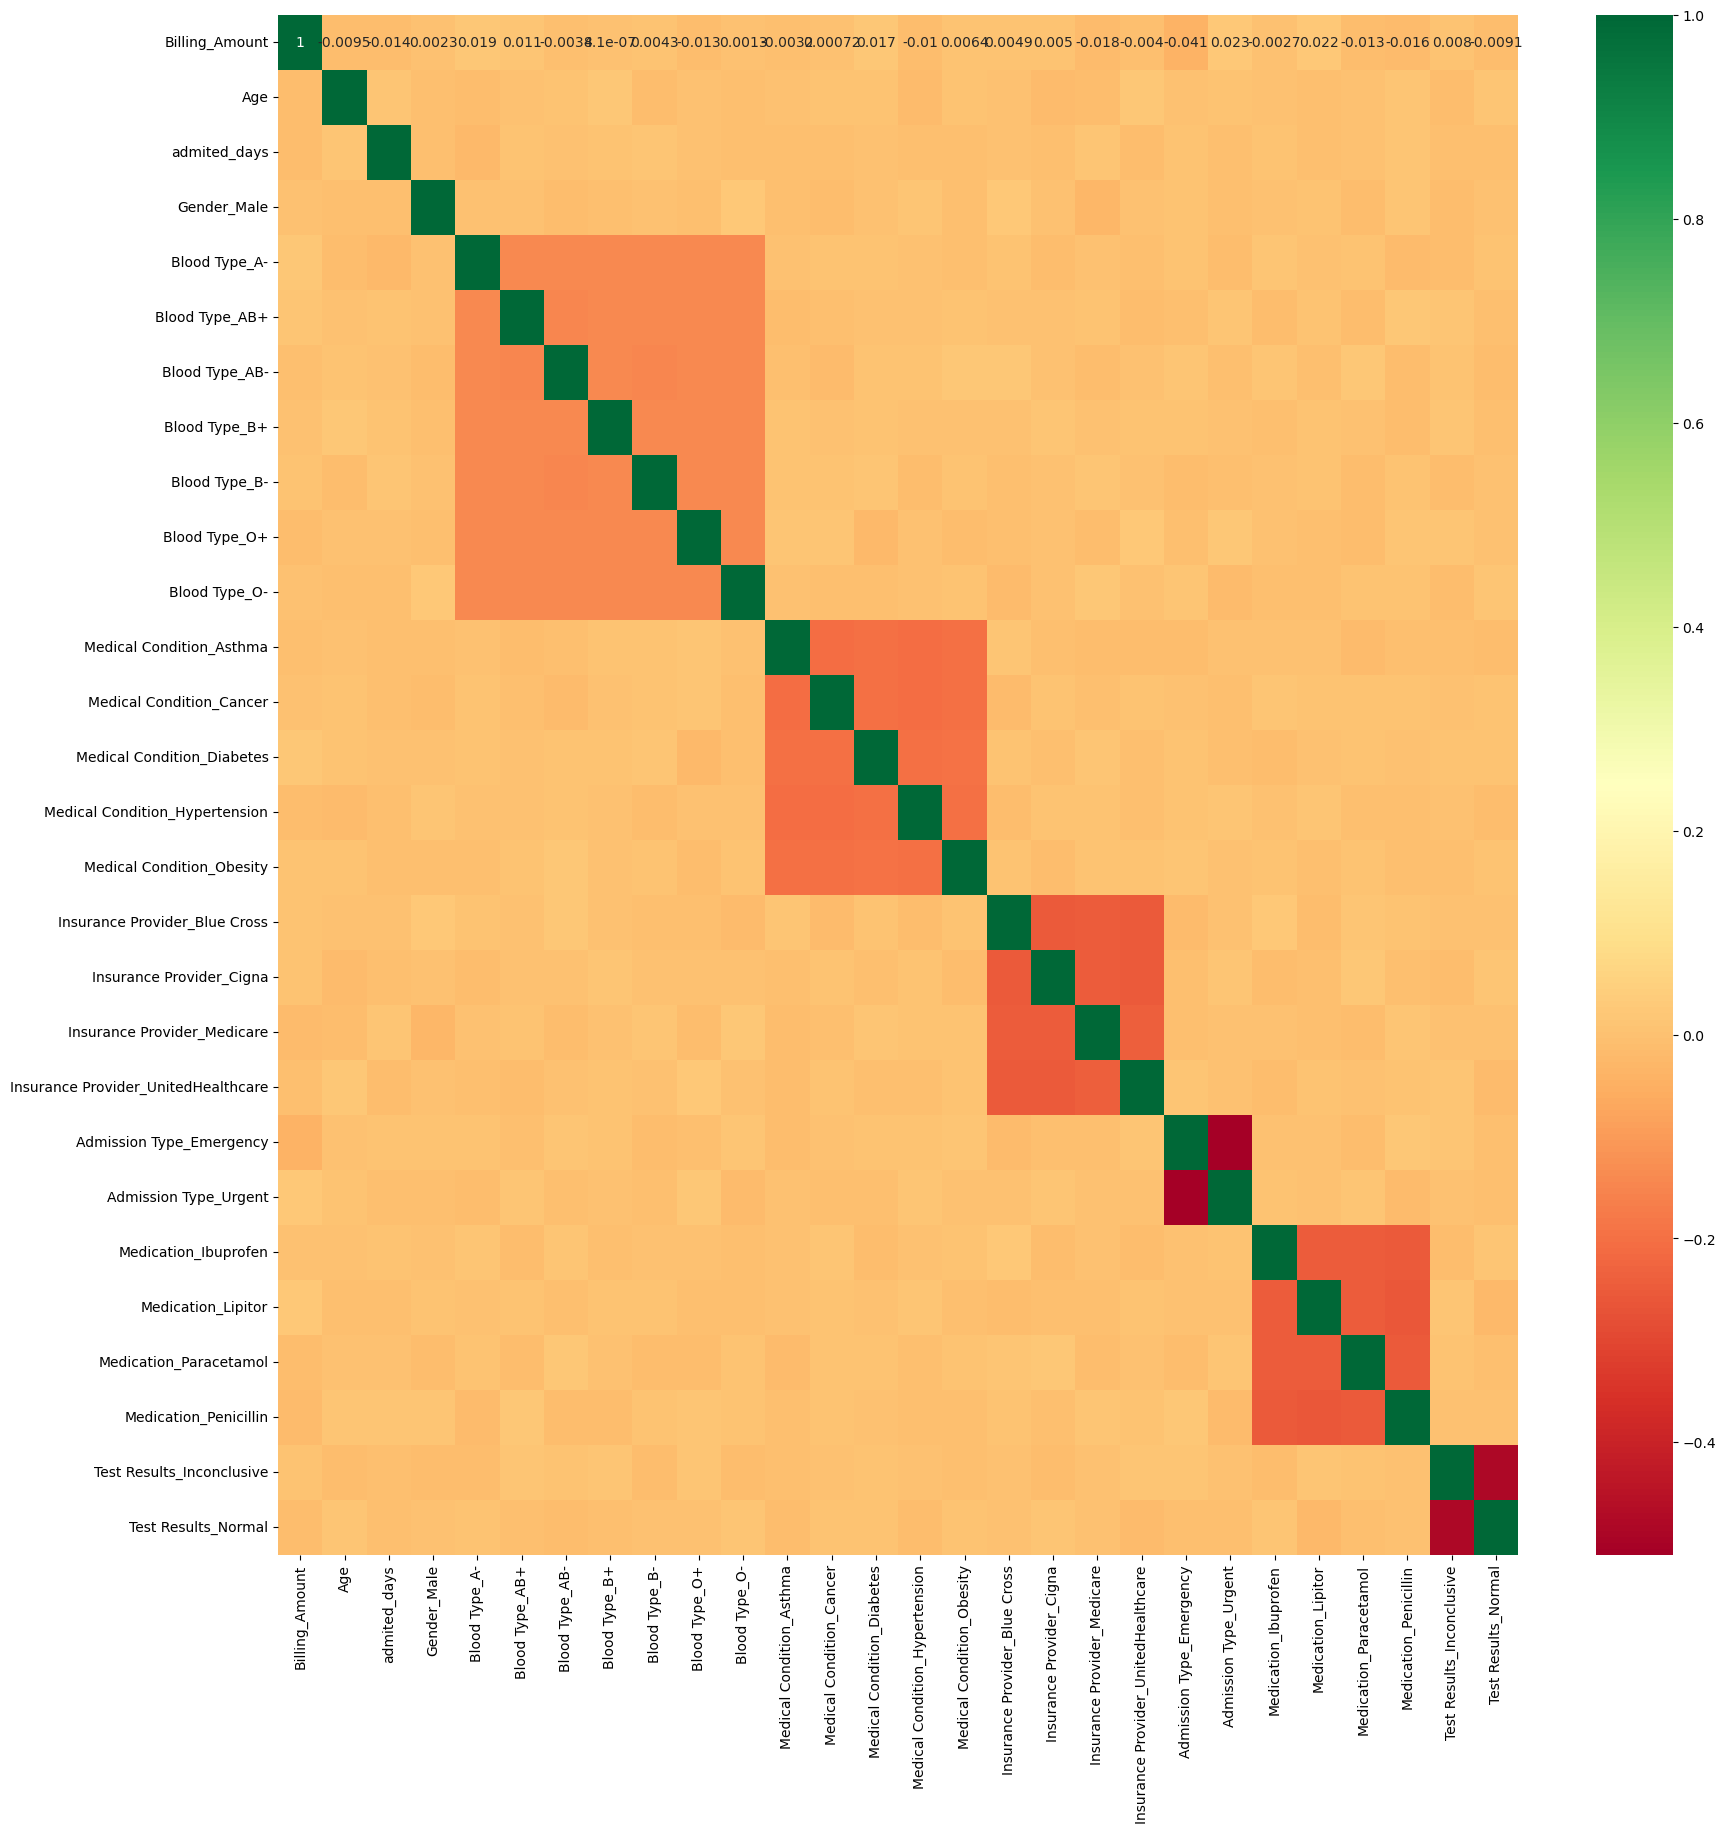

In [38]:
%matplotlib inline

# Check correlation b/w variables
cor_mat=df_final.corr()
top_cor_features=cor_mat.index
plt.figure(figsize=(20,20))

# heatmap
g= sns.heatmap(df_final[top_cor_features].corr(), annot=True, cmap="RdYlGn")

C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


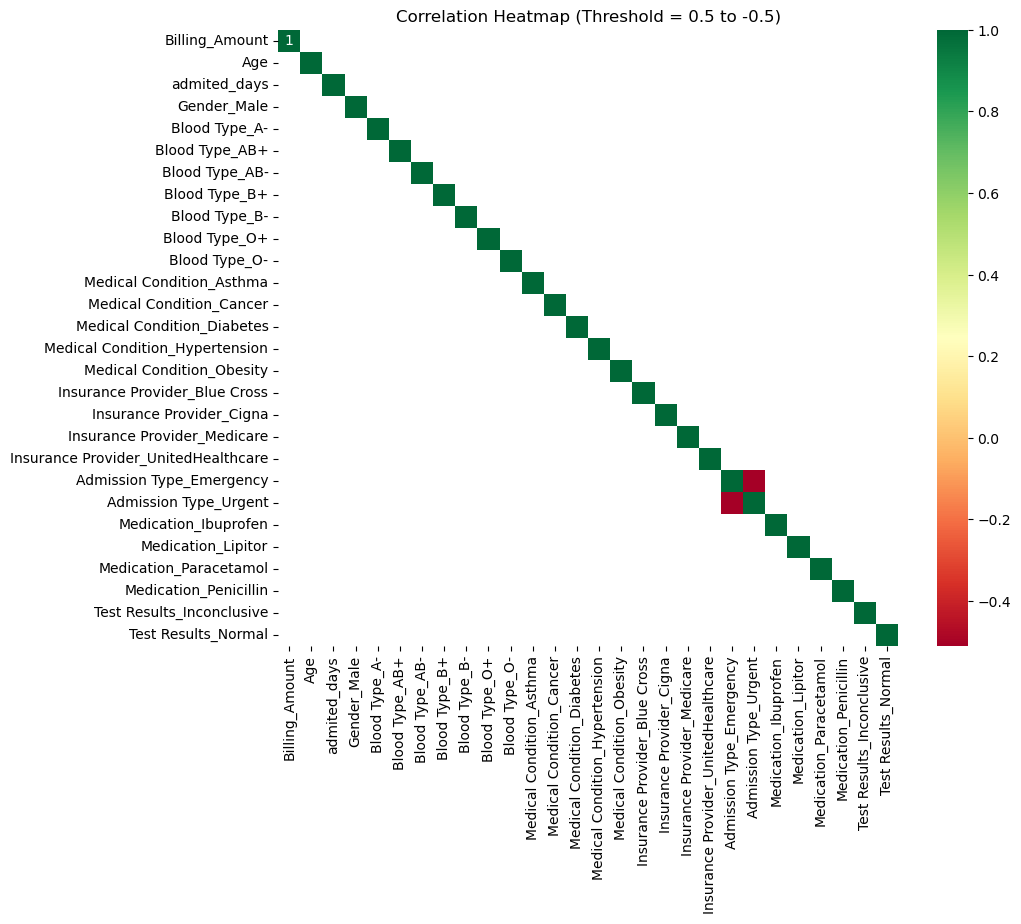

In [39]:
# Filter correlations above threshold
threshold_max = 0.5
threshold_min = -0.5
high_correlation = cor_mat[(cor_mat > threshold_max) | (cor_mat<threshold_min)]

# Create heatmap
plt.figure(figsize=(10, 8))
g = sns.heatmap(high_correlation, annot=True, cmap="RdYlGn")
plt.title(f"Correlation Heatmap (Threshold = {threshold_max} to {threshold_min})")
plt.show()

In [42]:
#definding my all independent variables
X= df_final.iloc[:,1:]

#definding my all Dependent variables
y= df_final.iloc[:,0]

In [43]:
##Importance of Features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(model.feature_importances_)

[0.16371748 0.15679359 0.05643654 0.02512111 0.0273773  0.02955129
 0.02654398 0.02486222 0.02231218 0.03057763 0.02849849 0.02860078
 0.01119898 0.01610066 0.03201592 0.03208647 0.0303777  0.03066692
 0.03470292 0.00167665 0.04053534 0.02653997 0.02072044 0.01912347
 0.02075153 0.04397234 0.01913809]


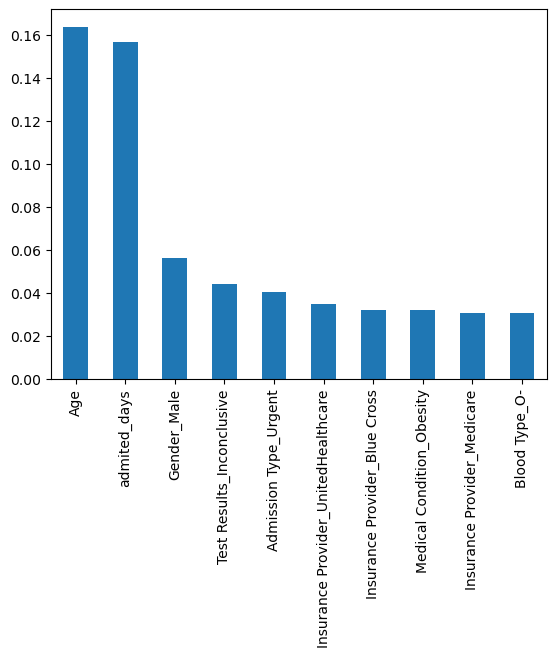

In [46]:
#plot graph of feature importance for better visualization

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance .nlargest(10).plot(kind='bar')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [52]:
#Hyperparameters
#a) estimators
n_estimators =  [int(x) for x in np.linspace(start =100, stop =1200, num = 12)]

#b max_features: number of features at every split = ['auto','sqrt']
max_features= ['auto','sqrt']

#c) Max numbers of levels-i.e. depth
max_depth = [int(x) for x in np.linspace(5,30, num=6)]

#d) Max_depth.append(None)

#e) Min number of samples required at split a node
min_samples_split = [2,5,10,15,100]

#f) Min number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

# Creat Random Grid
random_grid ={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [54]:
# Define base model for hyper tuning
rf = RandomForestRegressor()

# Starting my randomized search for Hypertuning
rf_random =  RandomizedSearchCV(estimator= rf,
                                param_distributions= random_grid,
                                scoring= 'neg_mean_squared_error',
                                n_iter =10,
                                cv = 5,
                                verbose=2,
                                random_state = 42,
                                n_jobs = 1)

In [55]:
# Linking Train data into model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.5s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.6s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.6s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.5s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.5s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.1s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.2s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.4s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.4s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.3s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.4s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.4s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.2s
[CV] END max_depth=5, max_feat

C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.1s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.2s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.2s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.1s


C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.1s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
#Check for prediction on Test data set
predictions = rf_random.predict(X_test)

In [57]:
# Chec predection
print(predictions)

[25079.24652038 25596.05157364 25862.79946735 ... 26331.30121303
 25642.89282541 25699.51192104]


C:\Users\shady\AppData\Local\Temp\ipykernel_9192\1444292668.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
C:\Users\shady\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Billing_Amount', ylabel='Density'>

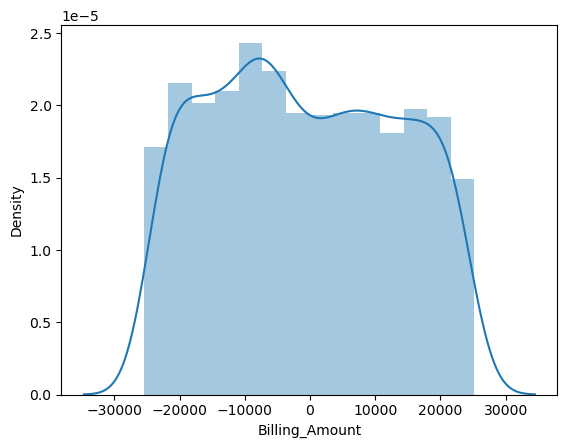

In [58]:
# Check the output of prediction by subtracting y_test and Prediction output from model
sns.distplot(y_test-predictions)

In [68]:
# Import necessary evaluation metrics from scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_rf = mean_squared_error(y_test, predictions)
mae_rf = mean_absolute_error(y_test, predictions)
r2_rf = r2_score(y_test, predictions)

# Print evaluation metrics
print("Mean Squared Error-RF:", mse_rf)
print("Mean Absolute Error-RF:", mae_rf)
print("R2 Score-RF:", r2_rf)

Mean Squared Error-RF: 199966117.7518661
Mean Absolute Error-RF: 12270.47977150228
R2 Score-RF: -0.004492484888685366
